In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 110
plt.rcParams['font.size'] = 9

## Réduction de dimension 3-D (Swiss Roll)


#### On génère des points en 3d qui créent un "roll", une figure qu'on imagine assez facilement déroulée

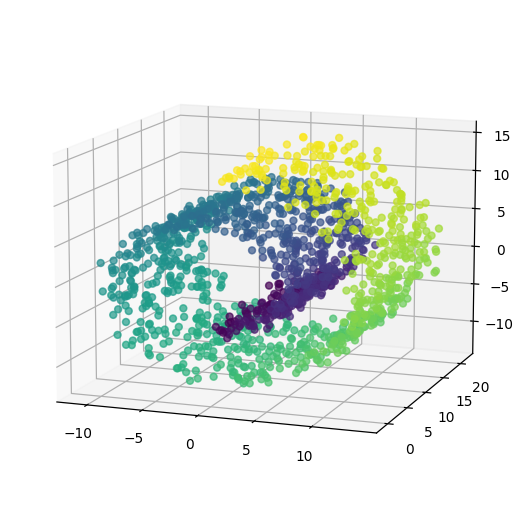

In [19]:
from sklearn.datasets import make_swiss_roll

 
points, colors = make_swiss_roll(n_samples=1500, noise=0.5)


fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.view_init(azim=-70, elev=12)
fig.add_axes(ax)

ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, alpha=0.7, s=20)

### Notre objectif ? Représenter cette donnée 3d en 2d. Pour cela on va comparer différents algorithmes de dimensionality reduction

On utilise 4 modèles différents :

- PCA (Principal Component Analysis)

- LLE (Locally Linear Embedding)

- TSNE (t-distributed Stochastic Neighbor Embedding)

- Isomap


J'explique rapidement leur fonctionnement après la visualisation.

In [20]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap


pca = PCA(n_components=2)
pca_points = pca.fit_transform(points)

tsne = TSNE(n_components=2)
tsne_points = tsne.fit_transform(points)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
lle_points = lle.fit_transform(points)

isomap = Isomap(n_components=2)
isomap_points = isomap.fit_transform(points)

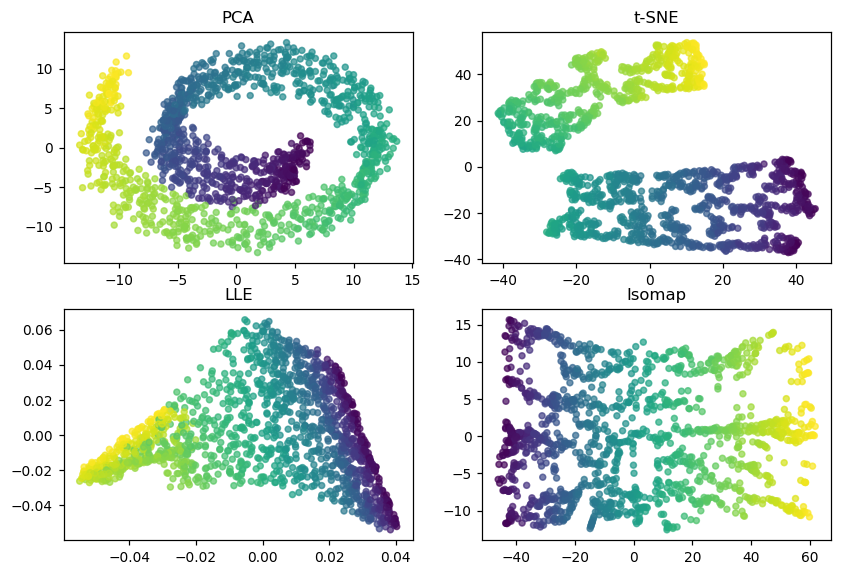

In [21]:
fig, ax = plt.subplots(2,2)

ax[0,0].scatter(pca_points[:, 0], pca_points[:, 1], c=colors, s=15, alpha=0.7)
ax[0,0].title.set_text("PCA")

ax[0,1].scatter(tsne_points[:, 0], tsne_points[:, 1], c=colors, s=15, alpha=0.7)
ax[0,1].title.set_text("t-SNE")
 
ax[1,0].scatter(lle_points[:, 0], lle_points[:, 1], c=colors, s=15, alpha=0.7)
ax[1,0].title.set_text("LLE")

ax[1,1].scatter(isomap_points[:, 0], isomap_points[:, 1], c=colors, s=15, alpha=0.7)
ax[1,1].title.set_text("Isomap")

### Comme on le voit, les algorithmes ont plus ou moins réussi à projeter sur un espace 2D des données initialement en 3D.

 

### Comment ?

 

- PCA : construit (ici, linéairement) de nouveaux vecteurs qui expliquent successivement au maximum la covariance des points, tout en étant orthogonaux les uns aux autres

 

 

- t-SNE : place les points dans l'espace d'arrivée de telle sorte à ce que leur distance dans cet espace ressemble à celle dans l'espace d'origine. Attention cependant, la taille des groupes et la distance entre eux dans l'espace d'arrivée (comme on le voit bien dans le prochain exemple) ne possède pas d'information.

 

 

- LLE (méthode non-linéaire) : identifie une matrice pour chaque point qui l'exprime en fonction de ses voisins dans l'espace d'origine. Puis cherche à replacer ces points dans l'espace d'arrivée de telle sorte que cette matrice soit conservée, ie chaque point garde globalement sa relation avec ses voisins

 

 

- Isomap (méthode non-linéaire) : similaire à LLE dans l'idée, mais utilise la distance géodésique plutôt qu'euclidienne. Pour calculer la distance entre des points, il faut faire un chemin en passant par d'autres points, et non une "ligne" droite dans la vide. Ceci a l'avantage de considérer davantage la structure globale de la donnée, plutôt qu'uniquement les points très voisins.

 

## Réduction de donnée 64-d : des chiffres écrits

 

### Visualisation 2-d de donnée 8x8

 



In [22]:
from sklearn.datasets import load_digits

X = load_digits().data
Y = load_digits().target

print(f"On a {X.shape[0]} samples avec {X.shape[1]} colonnes et {np.unique(Y).shape[0]} classes (les 10 chiffres). Chaque colonne représente un pixel, formant un carré de 8 * 8.")


On a 1797 samples avec 64 colonnes et 10 classes (les 10 chiffres). Chaque colonne représente un pixel, formant un carré de 8 * 8.


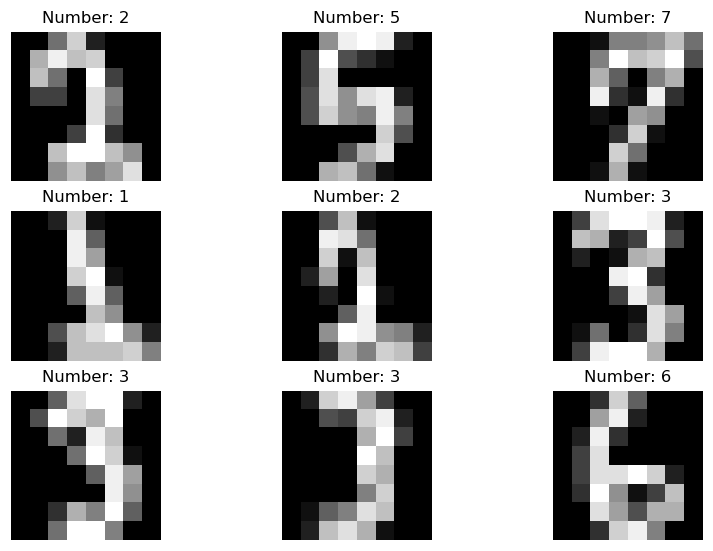

In [23]:
fig, ax = plt.subplots(3, 3)

for i in range(3):
    for j in range(3):
        index = np.random.randint(1797, )
        
        ax[i, j].imshow(X[index, :].reshape(8,8), cmap="gray")
        ax[i, j].title.set_text("Number: " + Y[index].astype(str))
        ax[i, j].axis("off")



### Réduction de donnée avec PCA

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

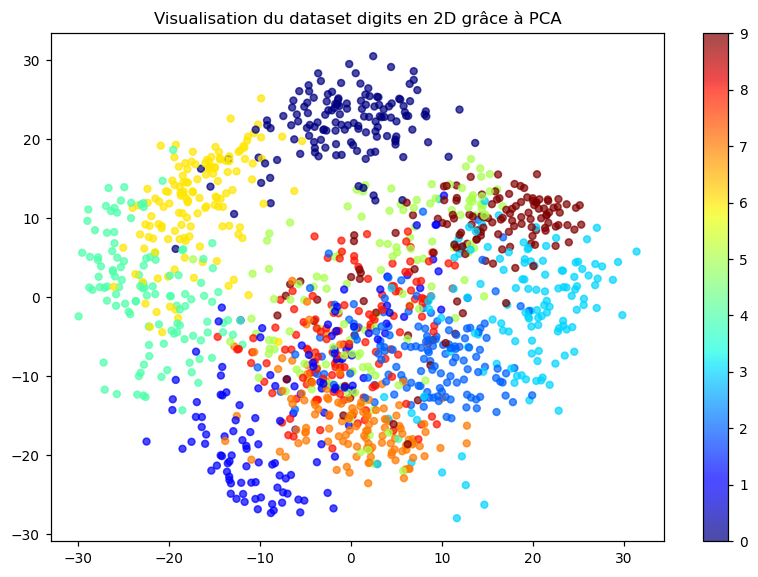

In [25]:
plt.title("Visualisation du dataset digits en 2D grâce à PCA")

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap="jet", alpha=0.7, s=20)

plt.colorbar()

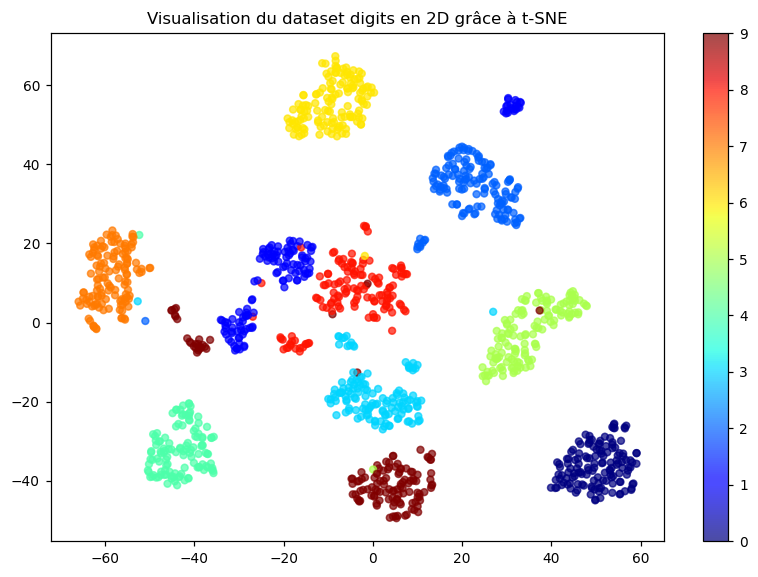

In [26]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, perplexity=20)

X_train_tsne = tsne.fit_transform(X_train)


plt.title("Visualisation du dataset digits en 2D grâce à t-SNE")

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=Y_train, cmap="jet", alpha=0.7, s=20)

plt.colorbar()

Oui, t-SNE nous permet de bien plus visualiser les différents clusters - et c'est impressionnant. Mais on ne peut pas entraîner de modèles là dessus, et comme dit plus haut la distance et taille des clusters n'a aucune signification sur cette visualisation. Enfin, cela prend plus de temps à calculer.

### Peut-on utiliser cette réduction de donnée pour entraîner un modèle ? Précis ?

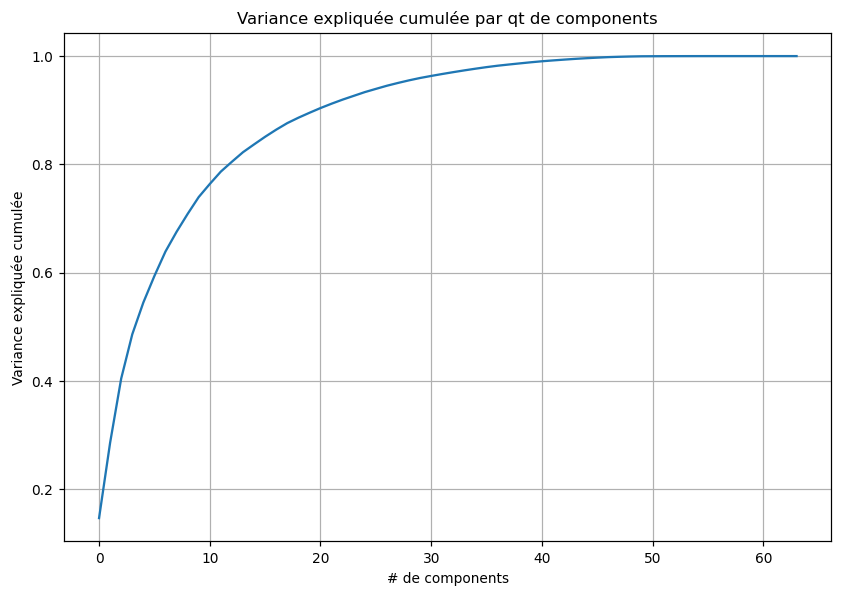

In [27]:
pca = PCA().fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel("# de components")
plt.ylabel("Variance expliquée cumulée")
plt.title("Variance expliquée cumulée par qt de components")
plt.grid()

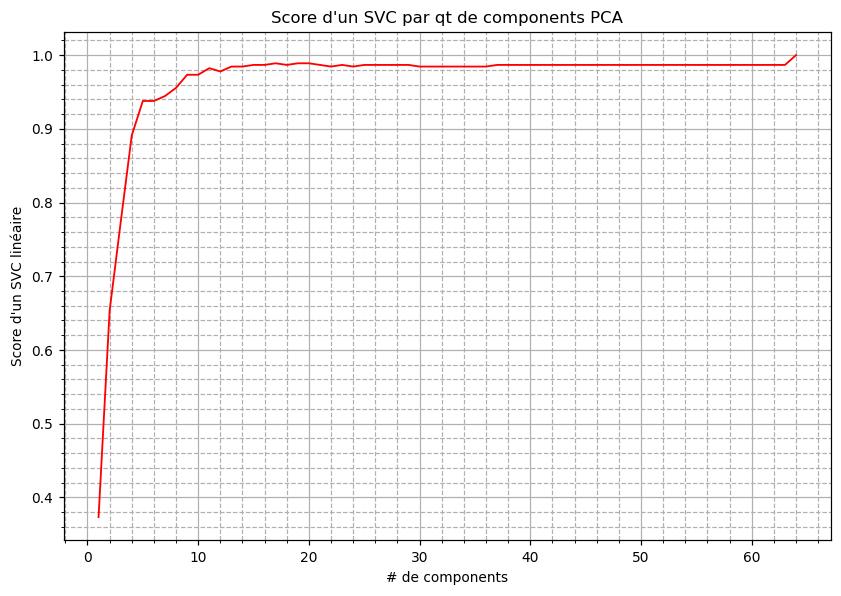

In [29]:
from sklearn.svm import SVC

model = SVC()
n_components = np.arange(1, 65)
lin_svc_score = np.ones(64)

 

for j in range(1, 64):
    pca = PCA(n_components=j)

    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)

    model.fit(X_train_reduced, Y_train)

    lin_svc_score[j-1] = model.score(X_test_reduced, Y_test)

plt.plot(n_components, lin_svc_score, linewidth=1.2, color="r")

plt.xlabel("# de components")
plt.ylabel("Score d'un SVC linéaire")
plt.title("Score d'un SVC par qt de components PCA")
plt.minorticks_on()
plt.grid(which="major")
plt.grid(which="minor", linestyle="--")

### Résultat : +95% de précision en utilisant seulement 8 components au lieu de 64